In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("C:/Users/Manuel/Desktop/Diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


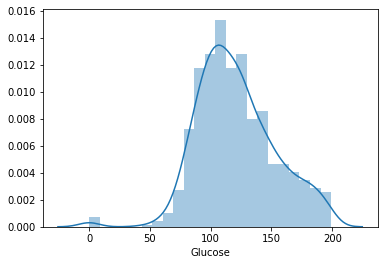

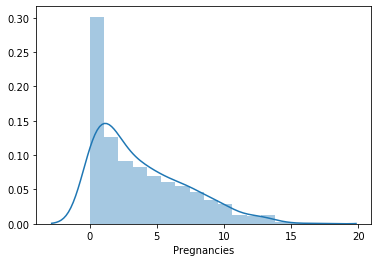

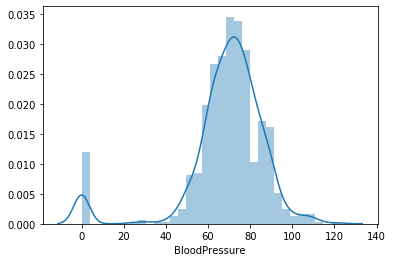

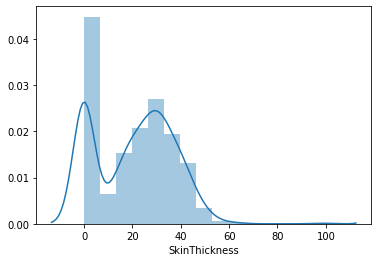

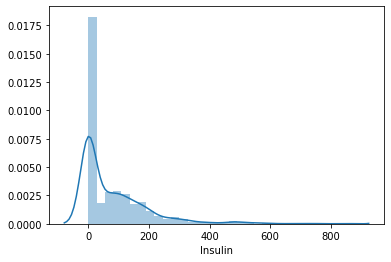

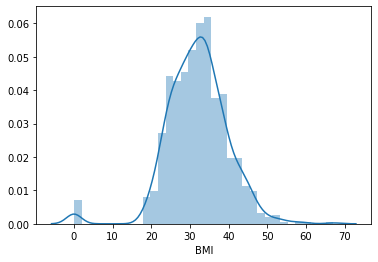

In [4]:
# Check how data are distributed
sns.distplot(df["Glucose"])
plt.show()
sns.distplot(df["Pregnancies"])
plt.show()
sns.distplot(df["BloodPressure"])
plt.show()
sns.distplot(df["SkinThickness"])
plt.show()
sns.distplot(df["Insulin"])
plt.show()
sns.distplot(df["BMI"])
plt.show()

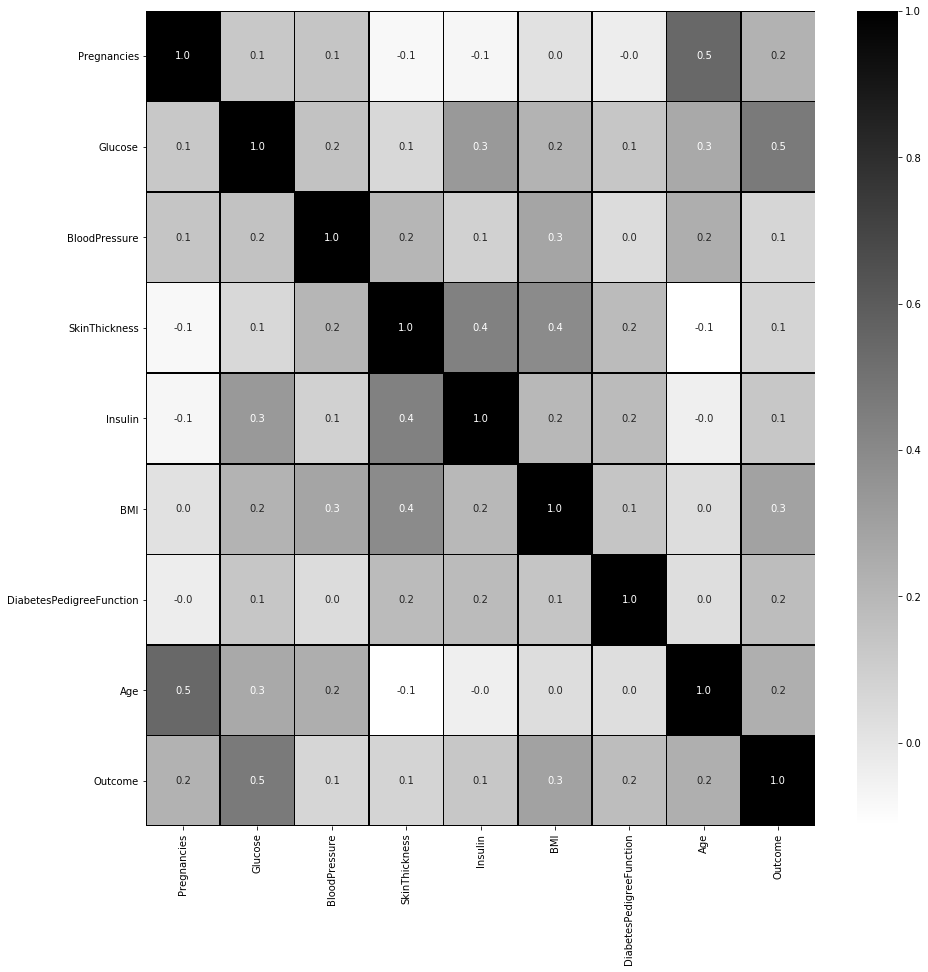

In [5]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.1f',ax=ax, cmap='gray_r')
plt.show()

In [6]:
# Drop outcome variable from the dataset
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [7]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# split dataset in two subsetes, one for training and one for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Manuel\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


accuracy for Bagging :
0.7507403490216816
accuracy for Random Forest :
0.773532522474881
accuracy for Boost :
0.7442094130089899


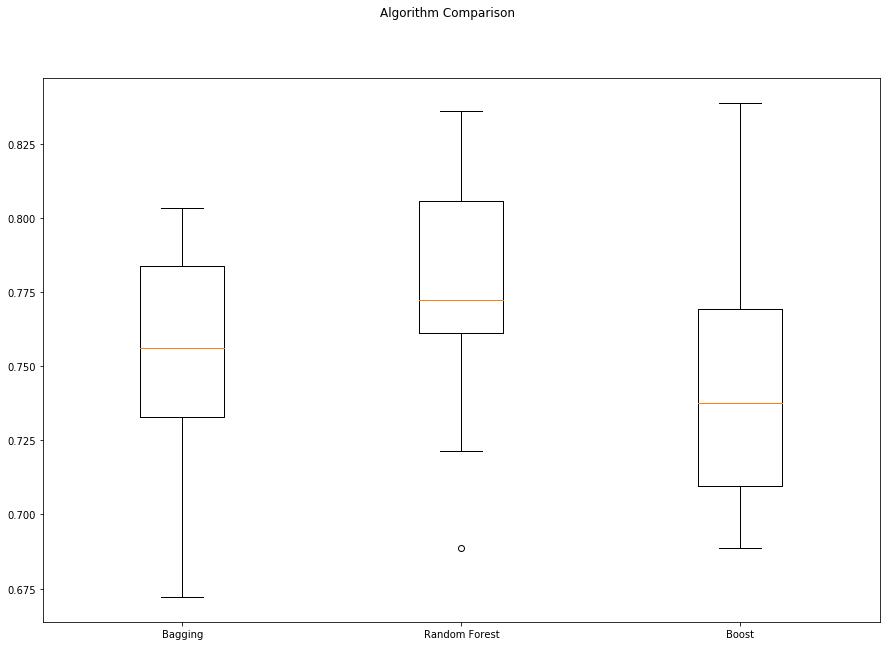

In [8]:
kfold = KFold(n_splits=10, random_state=123456)
  
# bagging classifier
models = [("Bagging", BaggingClassifier()),
          ("Random Forest", RandomForestClassifier()),
          ("Boost", AdaBoostClassifier())]


results = []
names = []

for name, model in models:
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
  print("accuracy for", name, ":")
  print(cv_results.mean())
  results.append(cv_results)
  names.append(name)

fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()